In [1]:
pip install opendatasets

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
import opendatasets as od

In [3]:
 od.download("https://www.kaggle.com/datasets/obulisainaren/forest-fire-c4")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: johngithiyon
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/obulisainaren/forest-fire-c4


100%|██████████| 123M/123M [00:00<00:00, 533MB/s] 


In [4]:
data_dir = "/content/forest-fire-c4/Forect Fire/Forest Fire_Dataset/train"

In [5]:
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [6]:
train_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="categorical",subset="training")

Found 2560 images belonging to 4 classes.


In [7]:
val_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="categorical", subset="validation")

Found 640 images belonging to 4 classes.


In [8]:
model = keras.Sequential([layers.Conv2D(16,3,padding="same",activation="relu",input_shape=(150,150,3)),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(32,3,padding="same",activation="relu"),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(128,activation="relu"),
                          layers.Dense(4,activation="softmax")])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,607,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,613,156 (21.41 MB)

 Trainable params: 5,613,156 (21.41 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
class_indices = train_gen.class_indices
class_names = list(class_indices.keys())
print(class_indices)
print(class_names)

{'fire': 0, 'nofire': 1, 'smoke': 2, 'smokefire': 3}
['fire', 'nofire', 'smoke', 'smokefire']


In [10]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [11]:
model.fit(train_gen,epochs=5,validation_data=val_gen,batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.5130 - loss: 1.7050

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 70s 833ms/step - accuracy: 0.5143 - loss: 1.6974 - val_accuracy: 0.6875 - val_loss: 0.7779
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 62s 770ms/step - accuracy: 0.7340 - loss: 0.6755 - val_accuracy: 0.7422 - val_loss: 0.6945
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 797ms/step - accuracy: 0.7695 - loss: 0.5838 - val_accuracy: 0.7375 - val_loss: 0.6554
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 60s 749ms/step - accuracy: 0.8245 - loss: 0.4632 - val_accuracy: 0.7656 - val_loss: 0.5897
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 59s 737ms/step - accuracy: 0.8748 - loss: 0.3455 - val_accuracy: 0.7906 - val_loss: 0.5751


In [12]:
model.save('/content/forest-fire-c4/forest.h5')

In [13]:
model = load_model('/content/forest-fire-c4/forest.h5')
print("Model Loaded")

Model Loaded


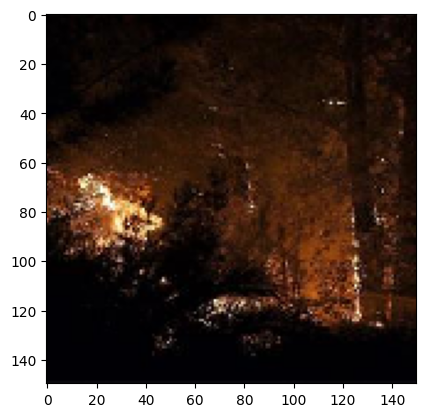

In [14]:
test_image = image.load_img("/content/forest-fire-c4/Forect Fire/Forest Fire_Dataset/test/fire/fire_test_1001.jpg",target_size=(150,150))
plt.imshow(test_image)
plt.axis()
plt.show()

In [15]:
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array,axis=0)
img_array/=255

In [16]:
prediction = model.predict(img_array)
ind = np.argmax(prediction)
prediction = prediction[0][ind]
print(prediction)
print(class_names[ind])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
0.9739007
fire
